### Plexus Connect with Jupyter Notebooks.

This is an example how data from Plexus Connect can be combined with Jupyter Notebooks. Firstly, it is necessary to establish connection between certain Plexus Connect schema(s) and Jupyter Notebook. The code below does precisely that. The code snippet below connects to a Plexus Connect data API, requests information about the currently signed-in user, and prints the username.  

In [5]:
from connect_api import DataApi
import json
# DataApi("apiKey", ["serverSchemaId"]) or DataApi("apiKey", ["serverSchemaId1", "serverSchemaId2"]) for 2 schemas
api = DataApi("<YOUR_API_KEY>", ["6C6F63616C6462"], connectUrl = "http://localhost:8080")
da = api.context.get("/rest/user/signedInUser")
print("Logged user is " + json.loads(da.text)["userName"]) 

Logged user is webadmin


The following code searches for a specific view named `Python chart` using the getViewByName method. If the view is found, its name is printed below the code snippet. If the view is not found (meaning getViewByName returns None), the code raises an exception with the message "View not found", indicating that the specified view does not exist.

In [6]:
view = api.getViewByName('Python chart')
if view is None:
  raise Exception("View not found")
print(view.name)

Python chart


This code snippet retrieves a view named `Python chart`, opens session for this view, and then prints the name of the view. 

In [7]:
chart_vs = api.openViewSession(api.getViewByName('Python chart'))
session = api.openViewSession(view)
session
print(view.name)

Python chart


This code snippet fetches a data tree from a session using the `getDataTree()` method and then prints it. It retrieves the data structure obtained from the session.

In [8]:
from connect_api import QueryTerm
#dt = chart_vs.getDataTree()
dt = session.getDataTree()
print(dt)

This code snippet extracts specific fields from `dt`. It searches for fields named `Temp.`, `CV`, and `CP` and assigns these fields to the variables `Temp`, `cvs`, and `cps`, respectively. Then, it attempts to find a view named `Python chart` using the API and opens a session for this view if found. If the view is found, it prints its name. If not, it return an exception stating "View not found". Finally, it prints the name of the view

In [9]:
Temp = dt.getFieldByName("Temp.")
cvs = dt.getFieldByName("CV")
cps = dt.getFieldByName("CP")
view = api.getViewByName("Python chart")
if view is None:
  raise Exception("View not found")

session = api.openViewSession(view)
session
print(view.name)

Python chart


This code searches for records where `Id` is less than 1010.

In [10]:
dt = session.getDataTree()
print("Simple search Id < 1010")
session.query([ QueryTerm(Temp.fieldId, "<", ["1010"])
], {})

Simple search Id < 1010


The following code snippets do specific queries, retrieve data for the fields `Temp.`, `CV` and `CP`, and keeps it in the variable `allData`. It then displays the first 10 entries of this data.

In [11]:
session.query([
  QueryTerm(Temp.fieldId, ">", ["5000"])
], {})

In [12]:
session.query([
  QueryTerm(cps.fieldId, ">", ["0"])
], {})

In [13]:
allData = session.getData(['Temp.', 'CV', 'CP'])
allData[:10]

[[298, 149.45, 157.762756],
 [298, 149.4, 157.716732],
 [300, 150.03, 158.348516],
 [400, 178.13, 186.44826],
 [500, 199.72, 208.0377],
 [600, 215.83, 224.141916],
 [700, 227.74, 236.057948],
 [800, 236.63, 244.94058],
 [900, 243.34, 251.651716],
 [1000, 248.48, 256.798036]]

This code creates and displays a scatter plot for temperature versus specific heat capacities (CV and CP) using data from a session. It involves these steps:
* Constructs a DataFrame from collected data on temperature, CV, and CP.
* Converts the data types of these columns to numeric.
* Sorts the DataFrame by temperature.
* Uses seaborn to create scatter plots for CV and CP as functions of temperature.
* Interpolates the curves for CV and CP across the temperature range and plots these as dashed lines.
* Sets the plot with labels, a legend, and displays the result.

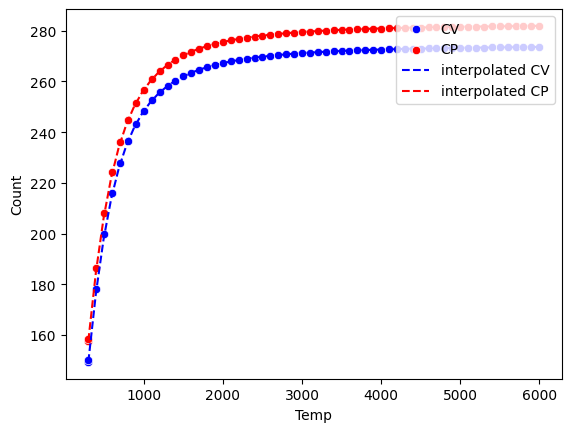

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a DataFrame from the data
temp = [inner_list[0] for inner_list in allData]
cv = [inner_list[1] for inner_list in allData]
cp = [inner_list[2] for inner_list in allData]
df = pd.DataFrame({'Temp': temp, 'CV': cv, 'CP': cp})

# Convert the columns to numeric types
df['Temp'] = pd.to_numeric(df['Temp'])
df['CV'] = pd.to_numeric(df['CV'])
df['CP'] = pd.to_numeric(df['CP'])

# Sort the DataFrame by 'Temp'
df = df.sort_values('Temp')

# Create the scatter plot using seaborn
sns.scatterplot(x='Temp', y='CV', data=df, color='blue', label='CV')
sns.scatterplot(x='Temp', y='CP', data=df, color='red', label='CP')

# Interpolate the curves
x_min = df['Temp'].min()
x_max = df['Temp'].max()
x_range = np.linspace(x_min, x_max, len(df['CP']))  # Match the number of data points in the y array

interpolated_cv = np.interp(x_range, df['Temp'], df['CV'])
interpolated_cp = np.interp(x_range, df['Temp'], df['CP'])

# Plot the interpolated curves
plt.plot(x_range, interpolated_cv, color='blue', linestyle='dashed', label='interpolated CV')
plt.plot(x_range, interpolated_cp, color='red', linestyle='dashed', label='interpolated CP')

# Set labels and legend
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()